In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
diamonds = pd.read_csv('diamonds.csv').reset_index(drop=True)

In [3]:
rick_diamonds = pd.read_csv('rick_diamonds.csv').reset_index(drop=True)

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [5]:
diamonds.price.mean()

3934.409644462607

# The mean value is very far from the average error so we look at the dataset closely.

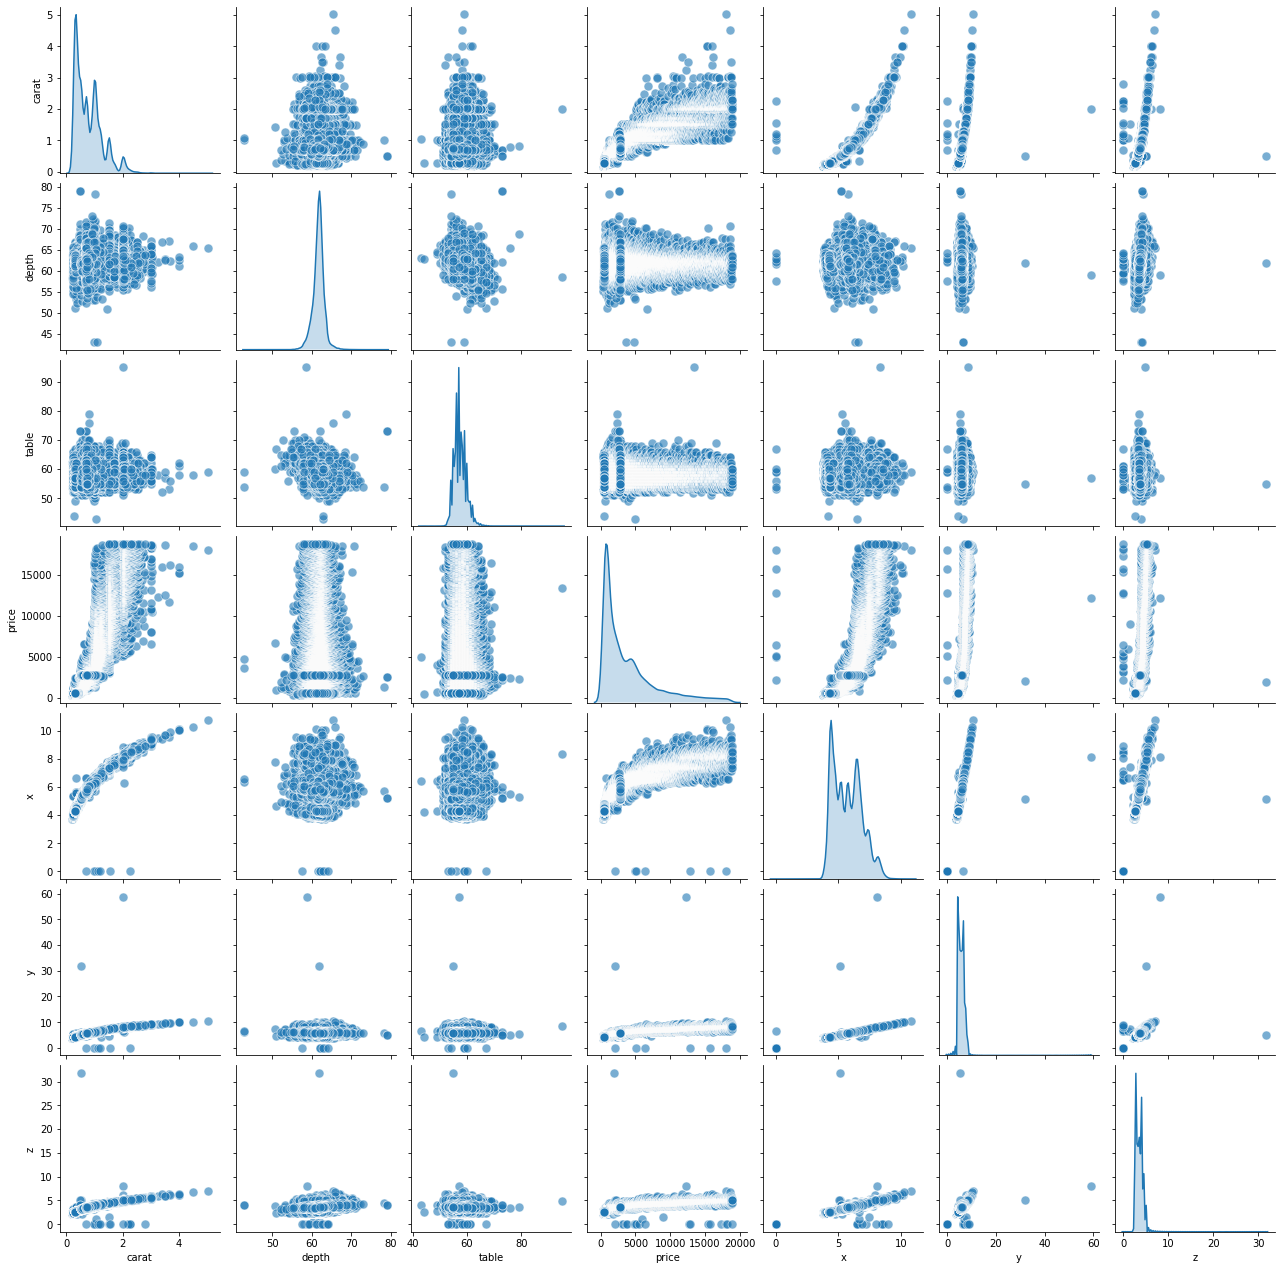

In [6]:
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'w'})

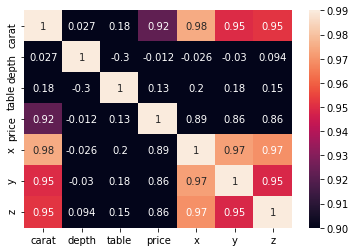

In [7]:
corr = diamonds.corr()
sns.heatmap(corr, vmin=0.9, vmax=0.99, annot=True)

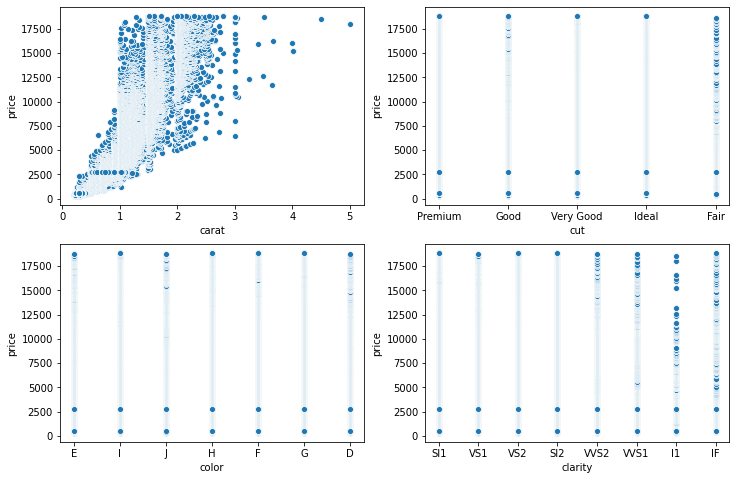

In [8]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot(diamonds['carat'], diamonds['price'], ax= ax[0,0])
sns.scatterplot(diamonds['cut'], diamonds['price'], ax= ax[0,1])
sns.scatterplot(diamonds['color'], diamonds['price'], ax= ax[1,0])
sns.scatterplot(diamonds['clarity'], diamonds['price'], ax= ax[1,1])

# Analysing by 'carat'

In [9]:
diamonds.groupby('carat').describe().T.loc['price']

carat,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,...,3.24,3.40,3.50,3.51,3.65,3.67,4.00,4.01,4.50,5.01
count,9.000000,9.000000,4.000000,268.000000,236.000000,186.000000,231.000000,209.000000,173.000000,117.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
mean,364.555556,380.222222,405.000000,486.776119,502.860169,553.908602,551.649351,574.382775,583.780347,607.547009,...,12300.0,15964.0,12587.0,18701.0,11668.0,16193.0,15984.0,15223.0,18531.0,18018.0
std,7.333333,20.504742,52.268537,70.326488,83.216825,122.451920,109.843735,115.738004,121.235971,152.784867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,345.000000,326.000000,342.000000,327.000000,336.000000,357.000000,337.000000,361.000000,360.000000,334.000000,...,12300.0,15964.0,12587.0,18701.0,11668.0,16193.0,15984.0,15223.0,18531.0,18018.0
25%,367.000000,386.000000,388.500000,437.000000,435.000000,460.000000,453.000000,470.000000,487.000000,504.000000,...,12300.0,15964.0,12587.0,18701.0,11668.0,16193.0,15984.0,15223.0,18531.0,18018.0
50%,367.000000,386.000000,404.000000,498.000000,485.500000,548.000000,554.000000,575.000000,586.000000,607.000000,...,12300.0,15964.0,12587.0,18701.0,11668.0,16193.0,15984.0,15223.0,18531.0,18018.0
75%,367.000000,386.000000,420.500000,530.000000,552.000000,577.000000,599.000000,622.000000,646.000000,664.000000,...,12300.0,15964.0,12587.0,18701.0,11668.0,16193.0,15984.0,15223.0,18531.0,18018.0
max,367.000000,394.000000,470.000000,688.000000,752.000000,1186.000000,814.000000,893.000000,828.000000,1776.000000,...,12300.0,15964.0,12587.0,18701.0,11668.0,16193.0,15984.0,15223.0,18531.0,18018.0


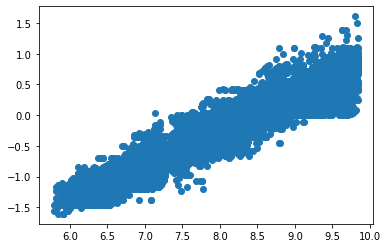

In [10]:
# Use log scale by 'carat'
plt.scatter(np.log(diamonds['price']),np.log(diamonds['carat']))

# Linear Regression

In [11]:
diamonds.shape

(48940, 10)

In [12]:
rick_diamonds.shape

(5000, 9)

In [13]:
model = LinearRegression()

x = diamonds[['carat']]
y = diamonds['price']

model = LinearRegression()
model.fit(x,y)

LinearRegression()

Coefficient Model: [7759.35277644]
Intercept Model: -2256.1316930738353
RMSE: 1542.846395465213
SCORE: 0.8504268875149481


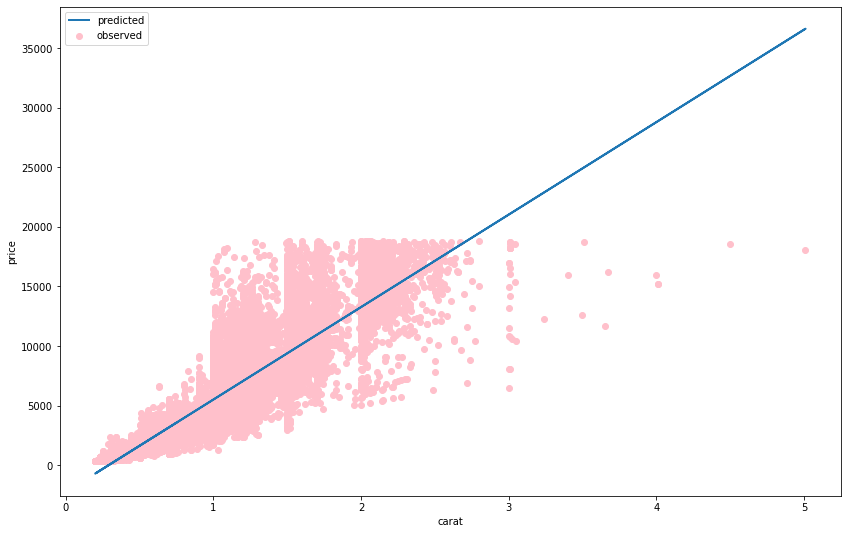

In [14]:
diamonds_pred = rick_diamonds[['carat']]

price_pred = model.predict(diamonds_pred)

y_pred = pd.Series(model.predict(x))
y_obs = diamonds['price']

rmse = np.sqrt(mean_squared_error(y_obs, y_pred).astype(int))
score = model.score(x, y)

plt.figure(figsize=(14,9))
plt.xlabel('carat')
plt.ylabel('price')
plt.scatter(x, y, color='pink', label='observed')
plt.plot(x, y_pred, label='predicted', lw=2)
plt.legend()

print(f'Coefficient Model: {model.coef_}\nIntercept Model: {model.intercept_}')
print(f'RMSE: {rmse}\nSCORE: {score}')

In [22]:
rick_diamonds['price_pred'] = model.predict(rick_diamonds[['carat']]).astype(int)

In [29]:
ricks1 = rick_diamonds.copy()
ricks1['cut'].replace('Ideal', 5, inplace=True)
ricks1['cut'].replace('Premium', 4, inplace=True)
ricks1['cut'].replace('Very Good', 3, inplace=True)
ricks1['cut'].replace('Good', 2, inplace=True)
ricks1['cut'].replace('Fair', 1, inplace=True)
ricks1['color'].replace('D', 7, inplace=True)
ricks1['color'].replace('E', 6, inplace=True)
ricks1['color'].replace('F', 5, inplace=True)
ricks1['color'].replace('G', 4, inplace=True)
ricks1['color'].replace('H', 3, inplace=True)
ricks1['color'].replace('I', 2, inplace=True)
ricks1['color'].replace('J', 1, inplace=True)
ricks1['clarity'].replace('IF', 8, inplace=True)
ricks1['clarity'].replace('VVS1', 7, inplace=True)
ricks1['clarity'].replace('VVS2', 6, inplace=True)
ricks1['clarity'].replace('VS1', 5, inplace=True)
ricks1['clarity'].replace('VS2', 4, inplace=True)
ricks1['clarity'].replace('SI1', 3, inplace=True)
ricks1['clarity'].replace('SI2', 2, inplace=True)
ricks1['clarity'].replace('I1', 1, inplace=True)

In [31]:
ricks1.head()


,carat,cut,color,clarity,depth,table,x,y,z,price_pred
0,0.91,3,3,2,63.4,57.0,6.10,6.18,3.89,4804
1,0.38,2,5,4,60.3,61.0,4.68,4.71,2.83,692
2,0.52,5,3,4,61.8,56.0,5.19,5.16,3.20,1778
3,1.10,5,4,5,61.3,56.0,6.65,6.69,4.09,6279
4,2.28,5,4,2,61.6,57.0,8.44,8.37,5.18,15435


In [34]:
ricks1_log = np.log(ricks1[['carat','cut','color','clarity']])
rick['price_pred'] = np.exp(model.predict(rick1_log))
rick['price_pred'] = rick['price_pred'].astype(np.int64)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)

# Exporting .csv

In [30]:
rick_diamonds.to_csv('rick_pred.csv')